In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_report = pd.read_csv('D:/ForME/3_Data/travel-time-prediction/checkpoints/report.csv')

In [56]:
df_report

,name,mse,rmse,mae,conv1,conv2,kernel_size,lstm,fc,dropout
0,CNN-32-32-kernel-2-lstm-64-32-drop-0.1,6.980470e+06,2642.041696,1933.299447,32,32,2,64,32,0.1
1,CNN-32-32-kernel-2-lstm-64-64-drop-0.1,7.028923e+06,2651.177762,1935.905621,32,32,2,64,64,0.1
2,CNN-32-32-kernel-2-lstm-128-32-drop-0.1,6.946210e+06,2635.538056,1923.937785,32,32,2,128,32,0.1
3,CNN-32-32-kernel-2-lstm-128-64-drop-0.1,6.967694e+06,2639.621373,1934.141403,32,32,2,128,64,0.1
4,CNN-32-32-kernel-2-lstm-200-32-drop-0.1,7.001438e+06,2646.002982,1935.694605,32,32,2,200,32,0.1
...,...,...,...,...,...,...,...,...,...,...
427,CNN-128-128-kernel-3-lstm-128-64-drop-0.3,7.006075e+06,2646.848868,1938.202766,128,128,3,128,64,0.3
428,CNN-128-128-kernel-3-lstm-200-32-drop-0.3,6.975942e+06,2641.120196,1928.364707,128,128,3,200,32,0.3
429,CNN-128-128-kernel-3-lstm-200-64-drop-0.3,6.988040e+06,2643.461002,1930.199493,128,128,3,200,64,0.3
430,CNN-128-128-kernel-3-lstm-256-32-drop-0.3,6.971657e+06,2640.374930,1932.906570,128,128,3,256,32,0.3


In [81]:
df_report.groupby(['conv1']).mean()

,mse,rmse,mae
conv1,,,
128,6.997264e+06,2645.187417,1930.347849
32,6.984194e+06,2642.716898,1930.089644
64,6.984854e+06,2642.848728,1929.570764


In [82]:
df_report.groupby(['conv2']).mean()

,mse,rmse,mae
conv2,,,
128,6.981478e+06,2642.210404,1928.038548
32,6.997960e+06,2645.317329,1932.232313
64,6.986874e+06,2643.225310,1929.737397


In [83]:
df_report.groupby(['kernel_size']).mean()

,mse,rmse,mae
kernel_size,,,
2,6.985656e+06,2642.996043,1927.485006
3,6.991885e+06,2644.172652,1932.520499


In [84]:
df_report.groupby(['lstm']).mean()

,mse,rmse,mae
lstm,,,
128,6.984675e+06,2642.805479,1928.474697
200,6.983690e+06,2642.623846,1930.062622
256,6.983751e+06,2642.635754,1929.116897
64,7.002967e+06,2646.272311,1932.356793


In [85]:
df_report.groupby(['fc']).mean()

,mse,rmse,mae
fc,,,
32,6.989312e+06,2643.684949,1929.869574
64,6.988230e+06,2643.483746,1930.135931


In [86]:
df_report.groupby(['dropout']).mean()

,mse,rmse,mae
dropout,,,
0.1,6.992969e+06,2644.376770,1930.772659
0.2,6.988726e+06,2643.573525,1929.880548
0.3,6.984617e+06,2642.802748,1929.355051


In [57]:
df_report[df_report['rmse'] == df_report['rmse'].min()]

,name,mse,rmse,mae,conv1,conv2,kernel_size,lstm,fc,dropout
178,CNN-64-64-kernel-2-lstm-128-32-drop-0.3,6.916263e+06,2629.849268,1923.681885,64,64,2,128,32,0.3


In [58]:
df_report[df_report['rmse'] == df_report['rmse'].max()]

,name,mse,rmse,mae,conv1,conv2,kernel_size,lstm,fc,dropout
121,CNN-128-32-kernel-2-lstm-64-64-drop-0.2,7.101198e+06,2664.662286,1926.323842,128,32,2,64,64,0.2


In [59]:
df_report[df_report['mae'] == df_report['mae'].min()]

,name,mse,rmse,mae,conv1,conv2,kernel_size,lstm,fc,dropout
140,CNN-128-128-kernel-2-lstm-200-32-drop-0.2,6.949902e+06,2636.245868,1911.281208,128,128,2,200,32,0.2


In [60]:
df_report[df_report['mae'] == df_report['mae'].max()]

,name,mse,rmse,mae,conv1,conv2,kernel_size,lstm,fc,dropout
337,CNN-128-32-kernel-3-lstm-64-64-drop-0.2,7.010604e+06,2647.726278,1949.137008,128,32,3,64,64,0.2


In [61]:
df_report['rmse'].mean()

2643.5843475687993

In [62]:
df_report['mae'].mean()

1930.0027524626917

In [13]:
df_report['conv1'] = df_report.apply(lambda row: row['name'].split('-')[1], axis='columns')
df_report['conv2'] = df_report.apply(lambda row: row['name'].split('-')[2], axis='columns')
df_report['kernel_size'] = df_report.apply(lambda row: row['name'].split('-')[4], axis='columns')
df_report['lstm'] = df_report.apply(lambda row: row['name'].split('-')[6], axis='columns')
df_report['fc'] = df_report.apply(lambda row: row['name'].split('-')[7], axis='columns')
df_report['dropout'] = df_report.apply(lambda row: row['name'].split('-')[9], axis='columns')

In [47]:
df_report[df_report['rmse'] == df_report['rmse'].min()]

,name,mse,rmse,mae,conv1,conv2,kernel_size,lstm,fc,dropout
178,CNN-64-64-kernel-2-lstm-128-32-drop-0.3,6.916263e+06,2629.849268,1923.681885,64,64,2,128,32,0.3


In [50]:
df_report[df_report['dropout'] == '0.1'].groupby(['conv1', 'conv2', 'dropout']).mean()

mse         rmse          mae
conv1 conv2 dropout                                        
128   128   0.1      6.999829e+06  2645.675860  1929.149415
      32    0.1      7.001726e+06  2646.031028  1932.518726
      64    0.1      7.001577e+06  2646.010935  1931.754576
32    128   0.1      6.980466e+06  2642.010213  1930.566834
      32    0.1      6.996165e+06  2644.990852  1933.962410
      64    0.1      6.992712e+06  2644.298174  1929.784558
64    128   0.1      6.982724e+06  2642.444559  1927.660532
      32    0.1      6.994469e+06  2644.662114  1932.358492
      64    0.1      6.987055e+06  2643.267193  1929.198386

In [55]:
df_report[df_report['dropout'] == '0.1']['rmse'].mean()

2644.376769803306

In [51]:
df_report[df_report['dropout'] == '0.2'].groupby(['conv1', 'conv2', 'dropout']).mean()

mse         rmse          mae
conv1 conv2 dropout                                        
128   128   0.2      6.987471e+06  2643.340305  1926.779213
      32    0.2      7.009466e+06  2647.464262  1933.704044
      64    0.2      6.990148e+06  2643.853142  1929.071648
32    128   0.2      6.970601e+06  2640.157784  1926.759287
      32    0.2      7.006975e+06  2647.003505  1934.141914
      64    0.2      6.970796e+06  2640.189669  1929.552838
64    128   0.2      6.977311e+06  2641.424096  1928.601174
      32    0.2      6.998677e+06  2645.456550  1931.292462
      64    0.2      6.987088e+06  2643.272413  1929.022350

In [54]:
df_report[df_report['dropout'] == '0.2']['rmse'].mean()

2643.5735250482176

In [52]:
df_report[df_report['dropout'] == '0.3'].groupby(['conv1', 'conv2', 'dropout']).mean()

mse         rmse          mae
conv1 conv2 dropout                                        
128   128   0.3      6.989617e+06  2643.748633  1929.486042
      32    0.3      7.000731e+06  2645.838039  1930.302665
      64    0.3      6.994812e+06  2644.724545  1930.364312
32    128   0.3      6.975082e+06  2641.005876  1926.957245
      32    0.3      6.986555e+06  2643.173551  1931.193392
      64    0.3      6.978394e+06  2641.622459  1927.888321
64    128   0.3      6.970201e+06  2640.086307  1926.387192
      32    0.3      6.986879e+06  2643.236060  1930.616707
      64    0.3      6.979281e+06  2641.789260  1930.999580

In [53]:
df_report[df_report['dropout'] == '0.3']['rmse'].mean()

2642.8027478548743

In [70]:
df_report[(df_report['conv1'] == '32') & (df_report['conv2'] == '32') & (df_report['kernel_size'] == '2')].groupby(['lstm', 'fc', 'dropout']).mean()

mse         rmse          mae
lstm fc dropout                                        
128  32 0.1      6.946210e+06  2635.538056  1923.937785
        0.2      6.958340e+06  2637.822362  1920.127483
        0.3      6.967350e+06  2639.553918  1931.321907
     64 0.1      6.967694e+06  2639.621373  1934.141403
        0.2      7.009993e+06  2647.619747  1934.140042
        0.3      6.981625e+06  2642.178700  1929.385012
200  32 0.1      7.001438e+06  2646.002982  1935.694605
        0.2      6.962202e+06  2638.585257  1924.518173
        0.3      6.986715e+06  2643.200407  1942.574204
     64 0.1      6.988874e+06  2643.619977  1929.567302
        0.2      7.001632e+06  2646.016680  1937.913698
        0.3      6.955344e+06  2637.264211  1925.595132
256  32 0.1      7.021508e+06  2649.792952  1934.236495
        0.2      6.966205e+06  2639.335458  1925.933954
        0.3      6.984129e+06  2642.698703  1927.009774
     64 0.1      6.993479e+06  2644.494398  1928.216813
        0.2      6.978202e+06  2641.608752  1925.751293
        0.3      6.970293e+06  2640.112489  1925.051643
64   32 0.1      6.980470e+06  2642.041696  1933.299447
        0.2      7.074188e+06  2659.597615  1945.656236
        0.3      6.963854e+06  2638.880558  1925.478385
     64 0.1      7.028923e+06  2651.177762  1935.905621
        0.2      6.960760e+06  2638.296901  1930.338164
        0.3      7.018219e+06  2649.183090  1929.049586

In [69]:
df_report[(df_report['conv1'] == '32') & (df_report['conv2'] == '64') & (df_report['kernel_size'] == '2')].groupby(['lstm', 'fc', 'dropout']).mean()

mse         rmse          mae
fc dropout                                        
32 0.1      6.973186e+06  2640.633832  1923.616829
   0.2      6.963789e+06  2638.869907  1927.522674
   0.3      6.961861e+06  2638.502078  1928.698143
64 0.1      6.964046e+06  2638.918977  1928.050815
   0.2      6.956703e+06  2637.531539  1926.853407
   0.3      6.967824e+06  2639.643093  1925.793195

In [24]:
import seaborn as sns

In [38]:
groupby_select = ['conv1', 'conv2']

In [39]:
df_group = df_report.groupby(groupby_select).mean()
df_group = df_group.reset_index()

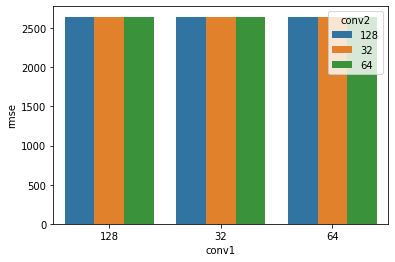

In [41]:
sns.barplot(x=groupby_select[0], y='rmse', hue=groupby_select[1], data=df_group)
plt.show()

In [42]:
df_group

,conv1,conv2,mse,rmse,mae
0,128,128,6.992306e+06,2644.254933,1928.471557
1,128,32,7.003974e+06,2646.444443,1932.175145
2,128,64,6.995513e+06,2644.862874,1930.396845
3,32,128,6.975383e+06,2641.057958,1928.094455
4,32,32,6.996565e+06,2645.055969,1933.099239
5,32,64,6.980634e+06,2642.036767,1929.075239
6,64,128,6.976745e+06,2641.318321,1927.549633
7,64,32,6.993342e+06,2644.451575,1931.422554
8,64,64,6.984475e+06,2642.776289,1929.740105


In [80]:
df_report.groupby(['conv2']).mean()

,mse,rmse,mae
conv2,,,
128,6.981478e+06,2642.210404,1928.038548
32,6.997960e+06,2645.317329,1932.232313
64,6.986874e+06,2643.225310,1929.737397


<AxesSubplot:xlabel='conv1', ylabel='rmse'>

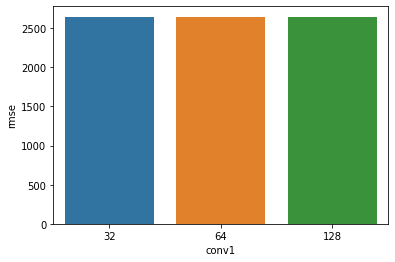

In [74]:
sns.barplot(x='conv1', y='rmse', data=df_report)